In [2]:
import os

import numpy as np
import pandas as pd

import cv2
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [4]:
def imhist(img):
    row, col = img.shape
    h = [0] * 256

    for i in range(row):
        for j in range(col):
            h[img[i, j]] += 1
    
    return np.array(h)/(row*col)

def cumsum(h):
    return [sum(h[:i+1]) for i in range(len(h))]

def hist_eq(img):
    h = imhist(img)
    cdf = np.array(cumsum(h)) 
    sk = np.uint8(255 * cdf)
    s1, s2 = img.shape
    Y = np.zeros_like(img)
    
    for i in range(s1):
        for j in range(s2):
            Y[i, j] = sk[img[i, j]]
            
    H = imhist(Y)
    return Y, h, H, sk

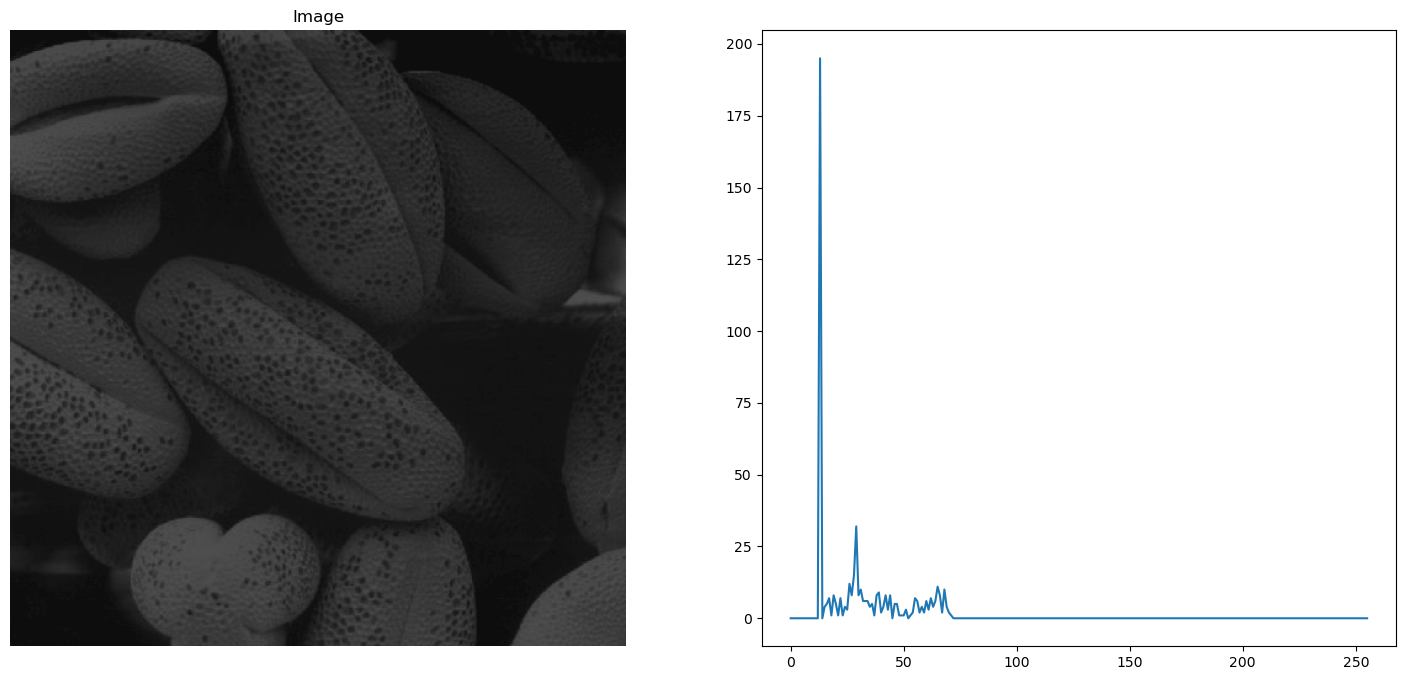

In [3]:
img_dir = "../../DIP3E_Original_Images_CH03"
img = Image.open(f"{img_dir}/Fig0316(4)(bottom_left).tif")
img = np.asarray(img)

img_hist = cv2.calcHist(img, [0], None, [256], [0, 256])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 8))
ax1.imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
ax1.set_title("Image")
ax1.axis('off')

ax2.plot(img_hist);

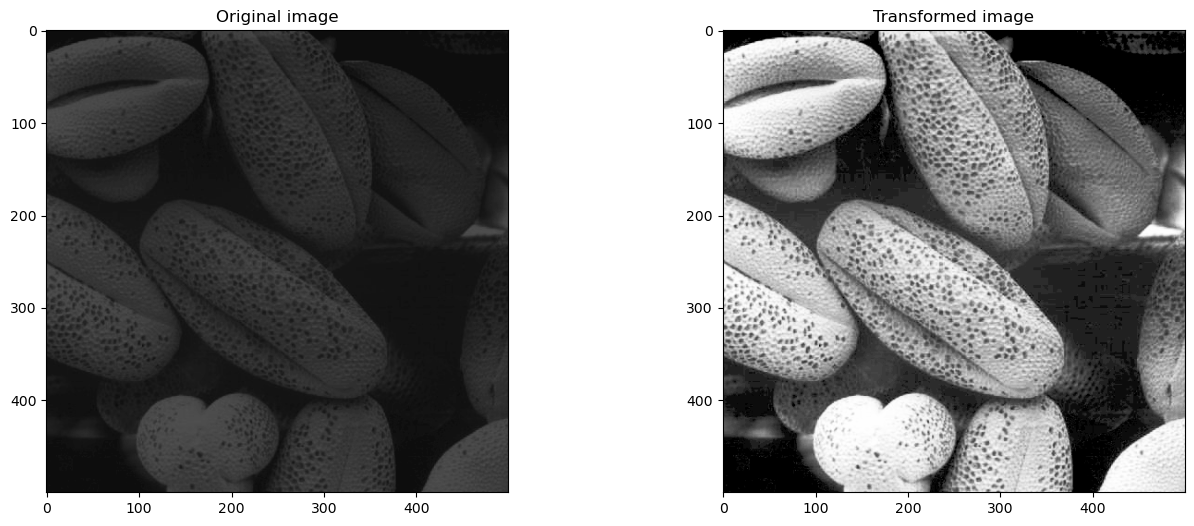

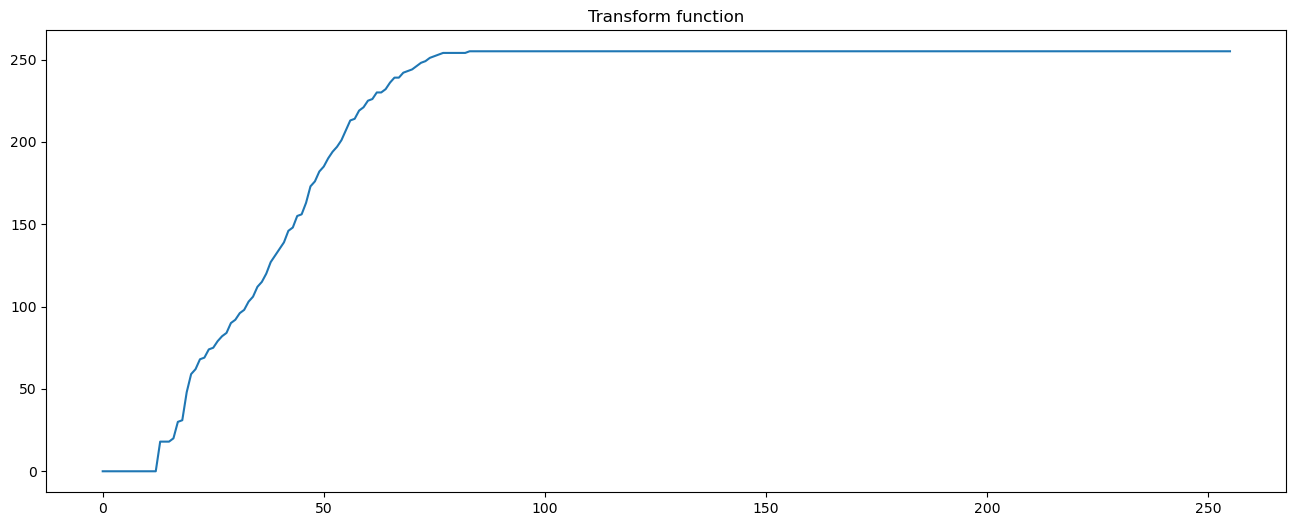

In [19]:
Y, h, H, sk = hist_eq(img)

plt.figure(figsize = (16, 6))
plt.subplot(121)
plt.title('Original image')
plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 255)

plt.subplot(122)
plt.title('Transformed image')
plt.imshow(Y, cmap = 'gray')

plt.figure(figsize = (16, 6))
plt.title('Transform function')
plt.plot(sk)

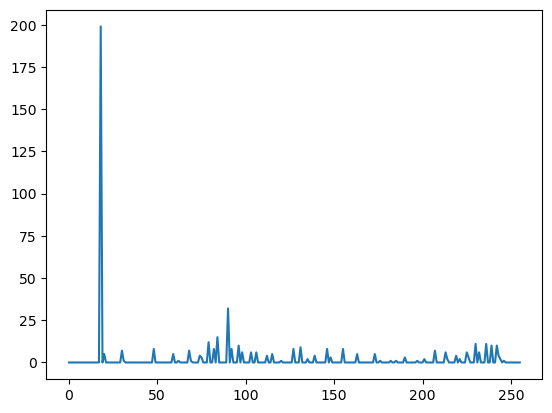

In [24]:
eq_img_hist = cv2.calcHist(Y, [0], None, [256], [0, 256])
plt.plot(eq_img_hist)

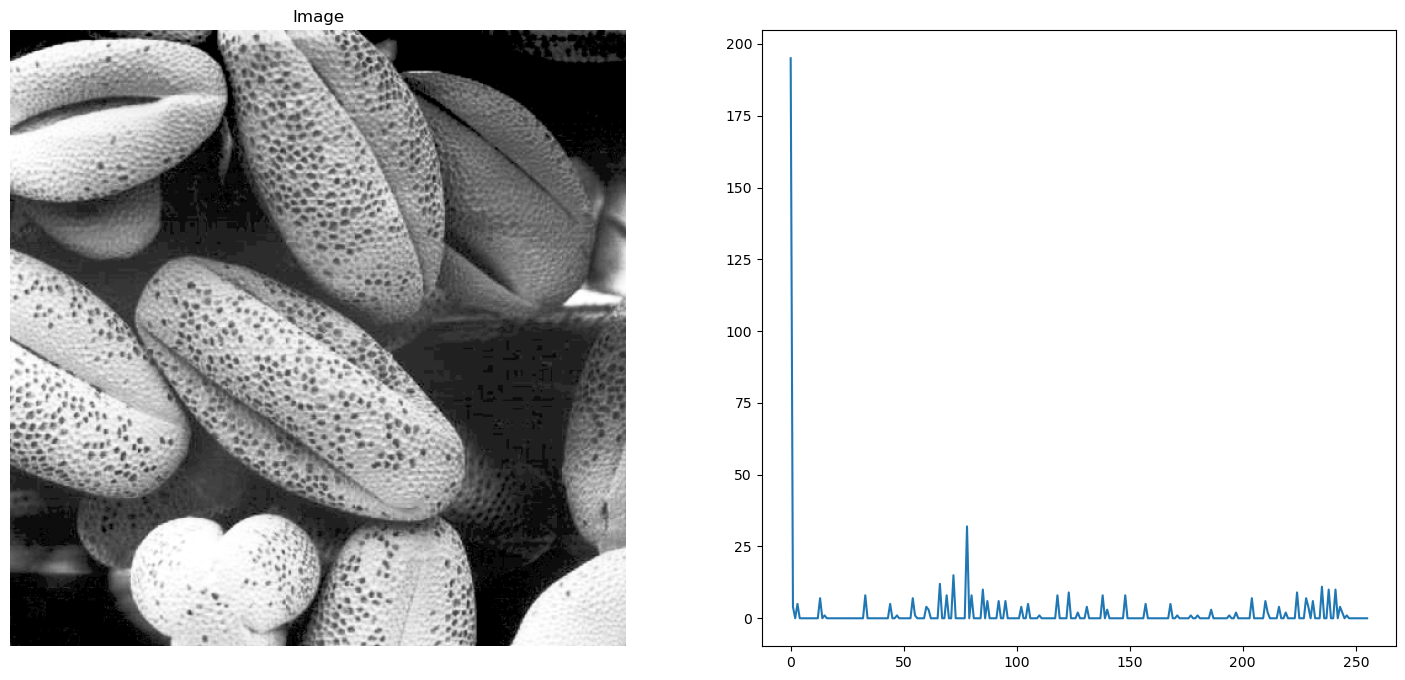

In [25]:
cv_img_eq = cv2.equalizeHist(img)
cv_img_eq_hist = cv2.calcHist(cv_img_eq, [0], None, [256], [0, 256])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 8))
ax1.imshow(cv_img_eq, cmap = 'gray', vmin = 0, vmax = 255)
ax1.set_title("Image")
ax1.axis('off')

ax2.plot(cv_img_eq_hist);

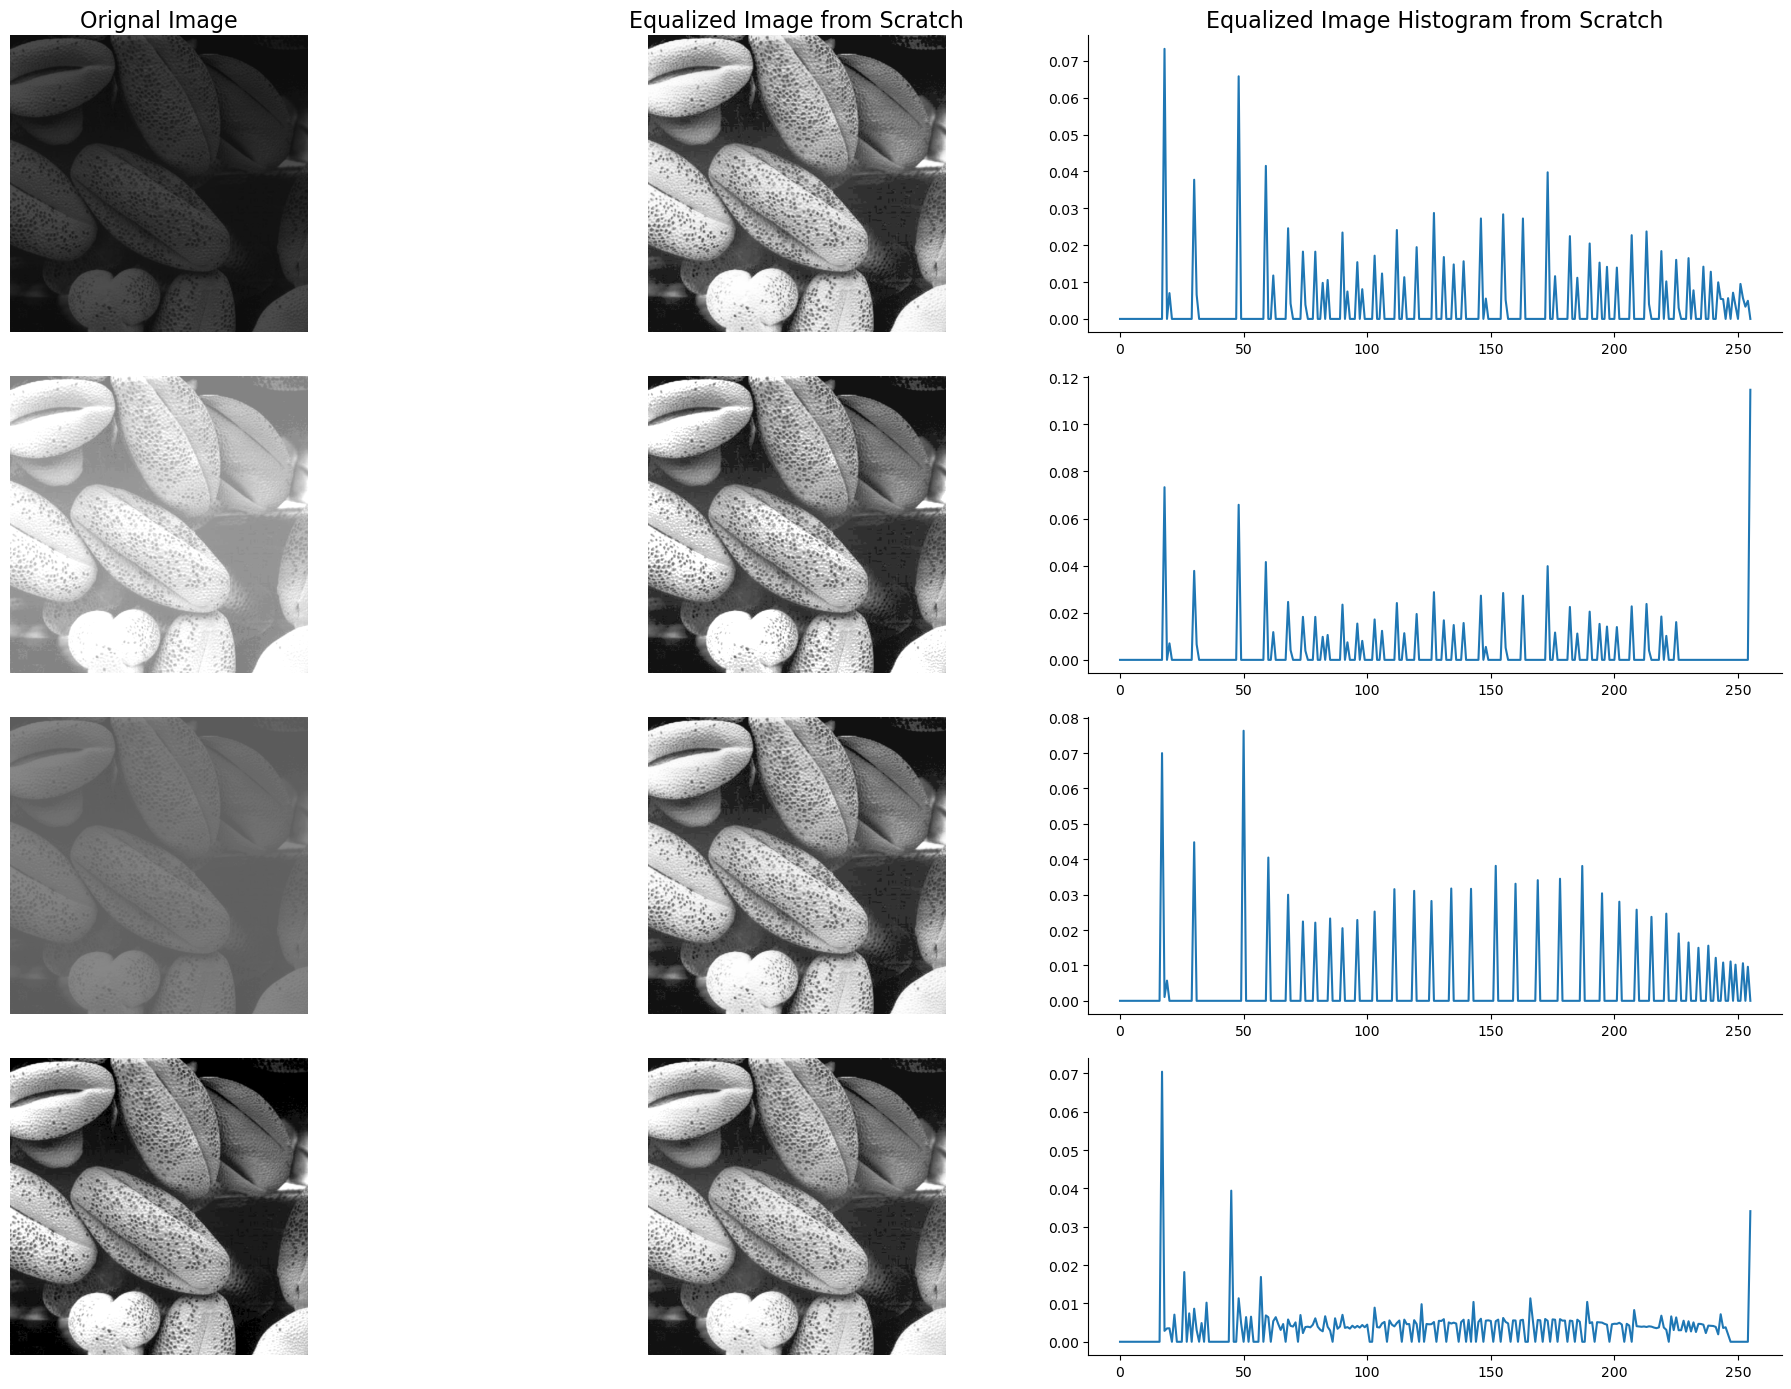

In [20]:
img_dir = "../../DIP3E_Original_Images_CH03"
img_names = ["Fig0316(4)(bottom_left).tif", "Fig0316(1)(top_left).tif", 
             "Fig0316(2)(2nd_from_top).tif", "Fig0316(3)(third_from_top).tif"]

fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (20, 14))

for ind in range(4):
    img = Image.open(f"{img_dir}/{img_names[ind]}")
    img = np.asarray(img)
    Y, h, H, sk = hist_eq(img)

    cv_img_eq = cv2.equalizeHist(img)

    axes[ind][0].imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
    axes[ind][1].imshow(Y, cmap = 'gray', vmin = 0, vmax = 255)
    axes[ind][2].plot(H)

    axes[ind][0].axis('off')
    axes[ind][1].axis('off')

    axes[ind][2].spines[['right', 'top']].set_visible(False)

cols = ["Orignal Image", "Equalized Image from Scratch", "Equalized Image Histogram from Scratch"]
for ax, col in zip(axes[0], cols):
    ax.set_title(col, fontsize = 16)

fig.tight_layout()
plt.show()

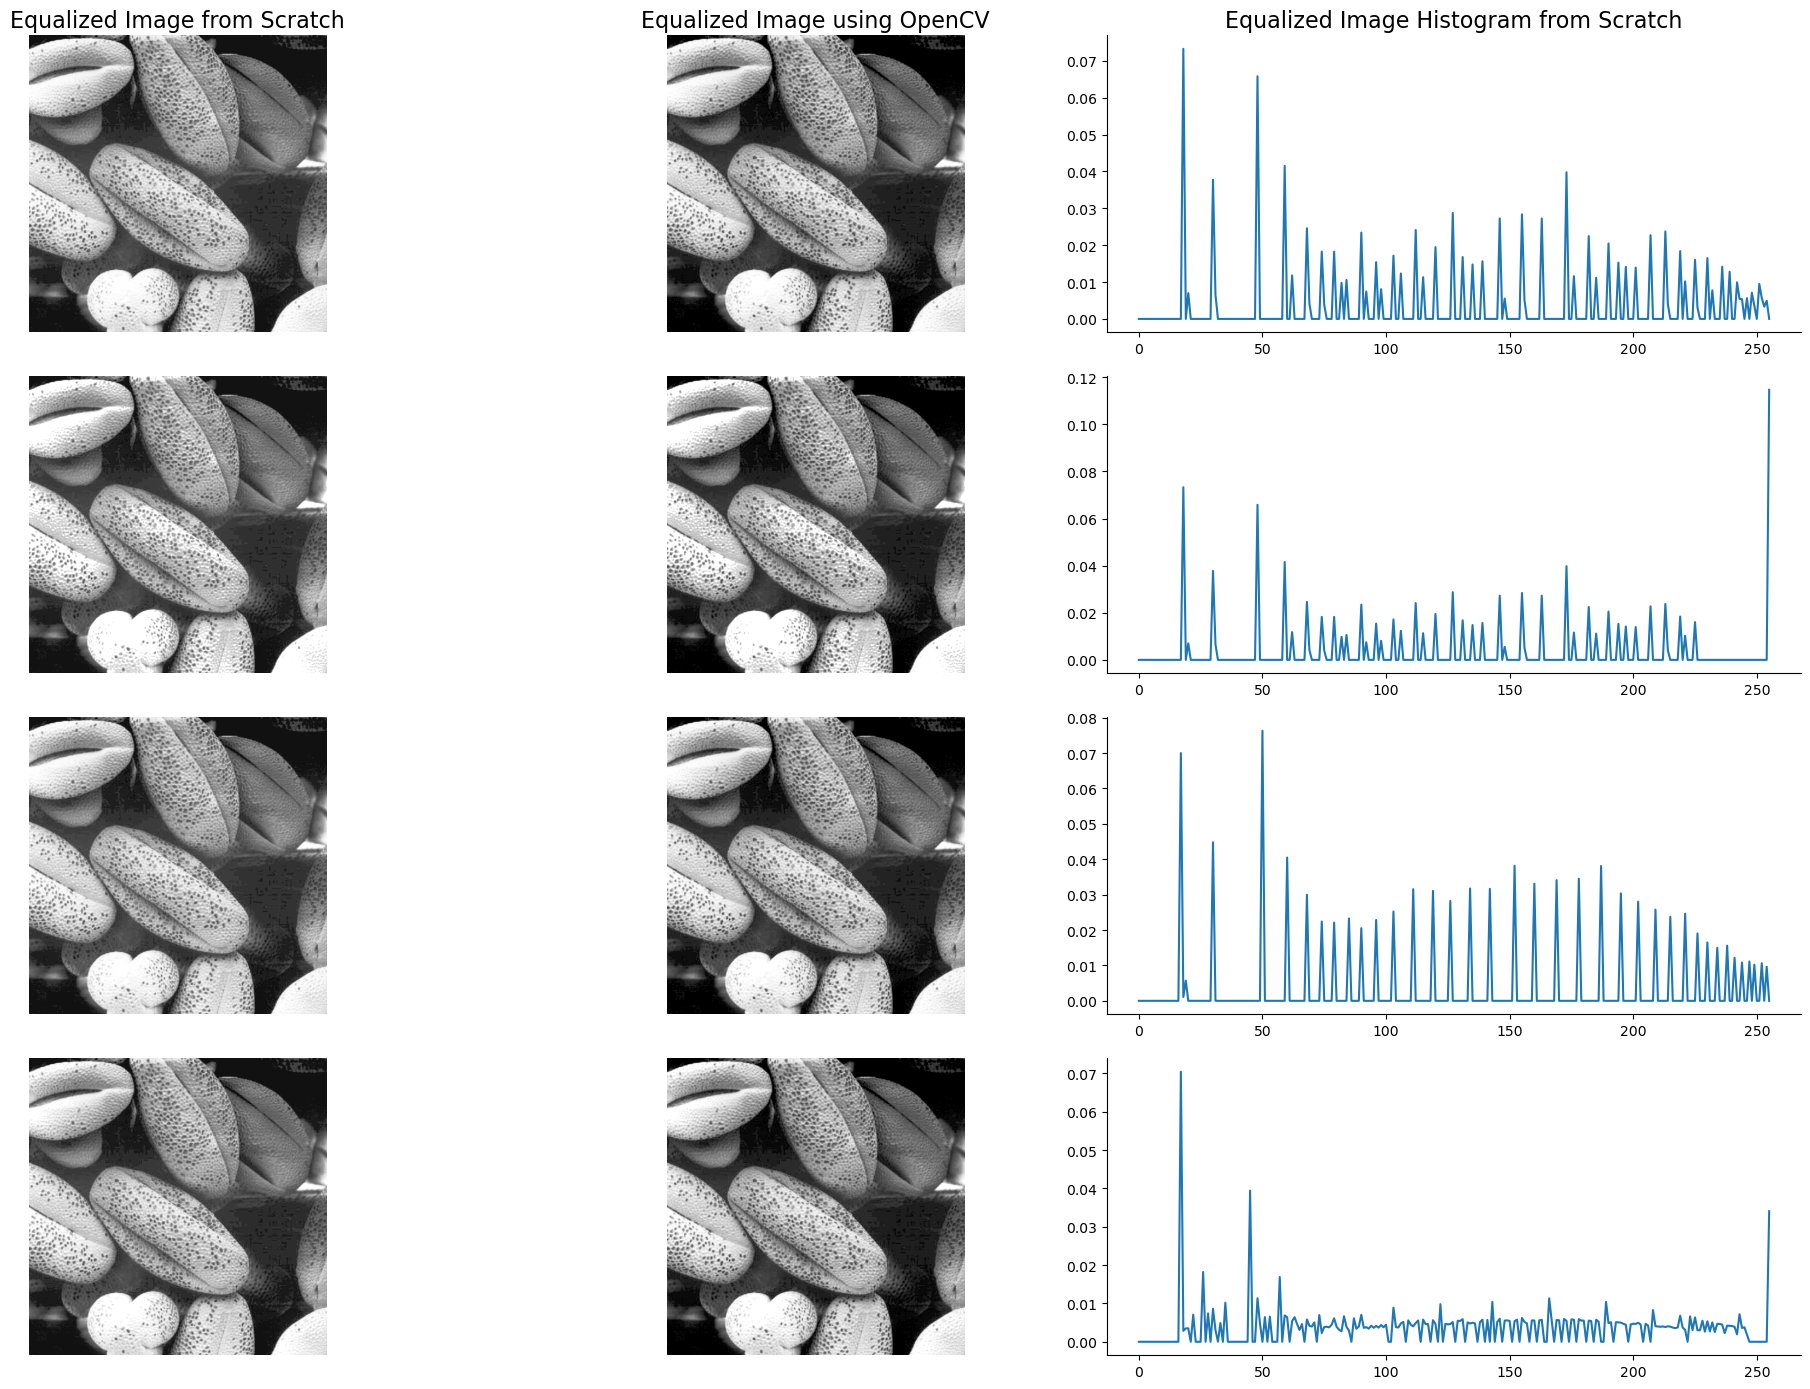

In [21]:
img_dir = "../../DIP3E_Original_Images_CH03"
img_names = ["Fig0316(4)(bottom_left).tif", "Fig0316(1)(top_left).tif", 
             "Fig0316(2)(2nd_from_top).tif", "Fig0316(3)(third_from_top).tif"]

fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (20, 14))

for ind in range(4):
    img = Image.open(f"{img_dir}/{img_names[ind]}")
    img = np.asarray(img)
    Y, h, H, sk = hist_eq(img)

    cv_img_eq = cv2.equalizeHist(img)

    axes[ind][0].imshow(Y, cmap = 'gray', vmin = 0, vmax = 255)
    axes[ind][1].imshow(cv_img_eq, cmap = 'gray', vmin = 0, vmax = 255)
    axes[ind][2].plot(H)

    axes[ind][0].axis('off')
    axes[ind][1].axis('off')

    axes[ind][2].spines[['right', 'top']].set_visible(False)


cols = ["Equalized Image from Scratch", "Equalized Image using OpenCV",
        "Equalized Image Histogram from Scratch"]
for ax, col in zip(axes[0], cols):
    ax.set_title(col, fontsize = 16)

fig.tight_layout()
plt.show()